In [1]:
#!pip install sidetable
#!pip install pandas-profiling==3.3.0

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [3]:
sns.set_theme(style="whitegrid"
              ,font_scale=1.2,
              context='talk',
              rc={'figure.figsize':(11.7,8.27)})

In [4]:
def list_attributes(obj):
    return [attr for attr in obj.__dir__() if not attr.startswith('_')]

In [5]:
# Read titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [6]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df2 = df[df.duplicated(keep=False)==True]
df2

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
4           0       3    male  35.0      0      0   8.0500        S   Third   
26          0       3    male   NaN      0      0   7.2250        C   Third   
28          1       3  female   NaN      0      0   7.8792        Q   Third   
29          0       3    male   NaN      0      0   7.8958        S   Third   
32          1       3  female   NaN      0      0   7.7500        Q   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male   NaN      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   

       who  adult_male deck  embark_town alive  alone  
4      man        True  NaN  Southampton    no   True  
26     man        True  NaN    Cherbourg    no   True  
28   woman       False  NaN   Queenstown   yes   True  
29     man        True  NaN  Southampton    no   True  
32   woman       False  NaN   Queenstown   yes   True  
..     ...         ...  ...          ...   ...    ...  
870    man        True  NaN  Southampton    no   True  
877    man        True  NaN  Southampton    no   True  
878    man        True  NaN  Southampton    no   True  
884    man        True  NaN  Southampton    no   True  
886    man        True  NaN  Southampton    no   True  

[160 rows x 15 columns]

In [8]:
(
    df2.groupby(df.columns.tolist(), dropna=False)
    .size()
    .to_frame('duplicate_count')
    .query('duplicate_count > 1')
    .sort_values('duplicate_count', ascending=False)
    .head(5)
    
)

duplicate_count
survived pclass sex    age sibsp parch fare   embarked class  who   adult_male deck embark_town alive alone                 
0        3      male   NaN 0     0     7.8958 S        Third  man   True       NaN  Southampton no    True                13
                                       8.0500 S        Third  man   True       NaN  Southampton no    True                12
                                       7.7500 Q        Third  man   True       NaN  Queenstown  no    True                 8
1        3      female NaN 0     0     7.7500 Q        Third  woman False      NaN  Queenstown  yes   True                 7
0        2      male   NaN 0     0     0.0000 S        Second man   True       NaN  Southampton no    True                 6

In [9]:
df2 = df2.drop_duplicates(subset='age')

In [10]:
df2

survived  pclass     sex    age  sibsp  parch     fare embarked   class  \
4           0       3    male  35.00      0      0   8.0500        S   Third   
26          0       3    male    NaN      0      0   7.2250        C   Third   
37          0       3    male  21.00      0      0   8.0500        S   Third   
53          1       2  female  29.00      1      0  26.0000        S  Second   
74          1       3    male  32.00      0      0  56.4958        S   Third   
91          0       3    male  20.00      0      0   7.8542        S   Third   
105         0       3    male  28.00      0      0   7.8958        S   Third   
112         0       3    male  22.00      0      0   8.0500        S   Third   
134         0       2    male  25.00      0      0  13.0000        S  Second   
144         0       2    male  18.00      0      0  11.5000        S  Second   
157         0       3    male  30.00      0      0   8.0500        S   Third   
163         0       3    male  17.00      0      0   8.6625        S   Third   
221         0       2    male  27.00      0      0  13.0000        S  Second   
369         1       1  female  24.00      0      0  69.3000        C   First   
405         0       2    male  34.00      1      0  21.0000        S  Second   
458         1       2  female  50.00      0      0  10.5000        S  Second   
469         1       3  female   0.75      2      1  19.2583        C   Third   
566         0       3    male  19.00      0      0   7.8958        S   Third   
603         0       3    male  44.00      0      0   8.0500        S   Third   
628         0       3    male  26.00      0      0   7.8958        S   Third   
658         0       2    male  23.00      0      0  13.0000        S  Second   
795         0       2    male  39.00      0      0  13.0000        S  Second   

       who  adult_male deck  embark_town alive  alone  
4      man        True  NaN  Southampton    no   True  
26     man        True  NaN    Cherbourg    no   True  
37     man        True  NaN  Southampton    no   True  
53   woman       False  NaN  Southampton   yes  False  
74     man        True  NaN  Southampton   yes   True  
91     man        True  NaN  Southampton    no   True  
105    man        True  NaN  Southampton    no   True  
112    man        True  NaN  Southampton    no   True  
134    man        True  NaN  Southampton    no   True  
144    man        True  NaN  Southampton    no   True  
157    man        True  NaN  Southampton    no   True  
163    man        True  NaN  Southampton    no   True  
221    man        True  NaN  Southampton    no   True  
369  woman       False    B    Cherbourg   yes   True  
405    man        True  NaN  Southampton    no  False  
458  woman       False  NaN  Southampton   yes   True  
469  child       False  NaN    Cherbourg   yes  False  
566    man        True  NaN  Southampton    no   True  
603    man        True  NaN  Southampton    no   True  
628    man        True  NaN  Southampton    no   True  
658    man        True  NaN  Southampton    no   True  
795    man        True  NaN  Southampton    no   True

In [11]:
df.stb.missing().style.format("{:.2f}", subset=['percent'])

In [12]:
msno.bar(df).set_title('Missing values by column')

Text(0.5, 1.0, 'Missing values by column')

In [13]:
(
    df.isna().sum()
    .to_frame('missing_count')
    .assign(missing_percent=lambda x: (x['missing_count']/len(df))*100)
    .assign(total = len(df))
    .sort_values('missing_percent', ascending=False)
    .style.format("{:.2f}", subset=['missing_percent'])
    
)
              

In [14]:
df.groupby('sex')['who'].value_counts()

sex     who  
female  woman    271
        child     43
male    man      537
        child     40
Name: who, dtype: int64

In [15]:
df.fillna({'age':0})

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   0.0      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [16]:
(
    df.assign(
        age_bfill = df.age.bfill(), 
        age_ffill = df.age.ffill(),
        age_interpolate = df.age.interpolate(),
    )
    .filter(like='age')
    .tail(10)
    .style.highlight_null(null_color='yellow')
)

In [17]:
vinho = datasets.load_wine(return_X_y=True, as_frame=True)

In [18]:
vinho = pd.DataFrame(vinho[0], columns=datasets.load_wine().feature_names)

In [19]:
vinho


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [20]:
vinho.magnesium.describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64

In [21]:
vinho.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [22]:
vinho.apply(scale).plot.box();
plt.xticks(rotation=60, ha='right');

In [23]:
def identificar_outliers(df=None, col=None):
    # Calcula o IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    # Calcula o limite superior e o limite inferior da regra dos 1.5 IQRs
    limite_superior = q3 + 1.5 * iqr
    limite_inferior = q1 - 1.5 * iqr
    
    # Identifica os outliers
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    
    return outliers

In [24]:
identificar_outliers(vinho, 'alcalinity_of_ash')

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
59     12.37        0.94  1.36               10.6       88.0           1.98   
73     12.99        1.67  2.60               30.0      139.0           3.30   
121    11.56        2.05  3.23               28.5      119.0           3.18   
127    11.79        2.13  2.78               28.5       92.0           2.13   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
59         0.57                  0.28             0.42             1.95  1.05   
73         2.89                  0.21             1.96             3.35  1.31   
121        5.08                  0.47             1.87             6.00  0.93   
127        2.24                  0.58             1.76             3.00  0.97   

     od280/od315_of_diluted_wines  proline  
59                           1.82    520.0  
73                           3.50    985.0  
121                          3.69    465.0  
127                          2.44    466.0

In [25]:
df,_ = datasets.load_wine(return_X_y=True, as_frame=True)
print(df.shape) 
df.head()

(178, 13)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [26]:
df.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');

In [27]:
def is_outlier(array, extreme=False):
    """Custom function to
    identify outliers in an array""" 
    q1,q3 = np.quantile(array, [.25,.75]) 
    iqr = q3-q1 
    factor = 3. if extreme else 1.5
    upper_outlier = q3 + factor*iqr 
    lower_outlier = q1 - factor*iqr
    return (array < lower_outlier) | (array > upper_outlier)

In [28]:
is_outlier(df.alcalinity_of_ash).sum()

4

In [29]:
df.apply(is_outlier).sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [30]:
# Remove outliers usando filtro com .any(axis=1)mque vai verificar se há algum outlier em qualquer coluna com True
df[~df.apply(is_outlier).any(axis=1)]

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
172    14.16        2.51  2.48               20.0       91.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
172        0.70                  0.44             1.24             9.70  0.62   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
172                          1.71    660.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[161 rows x 13 columns]

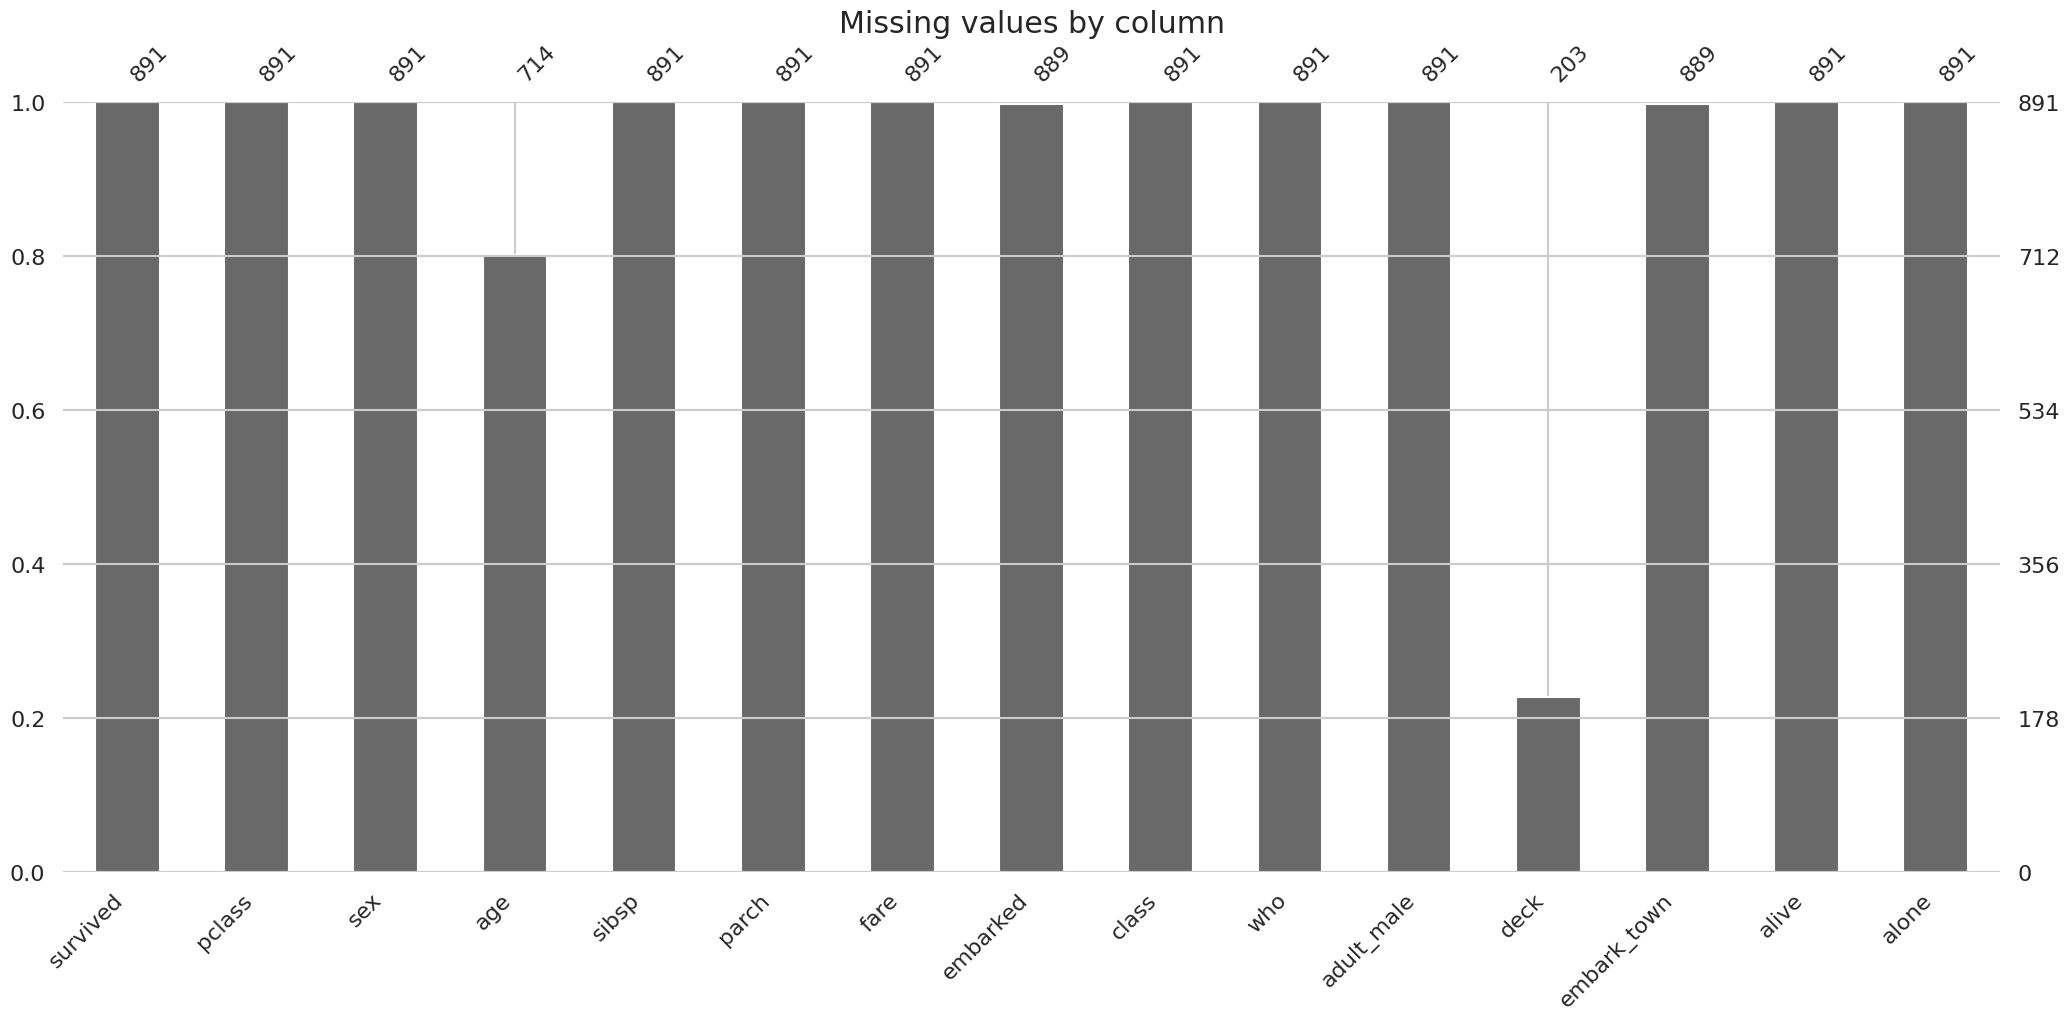

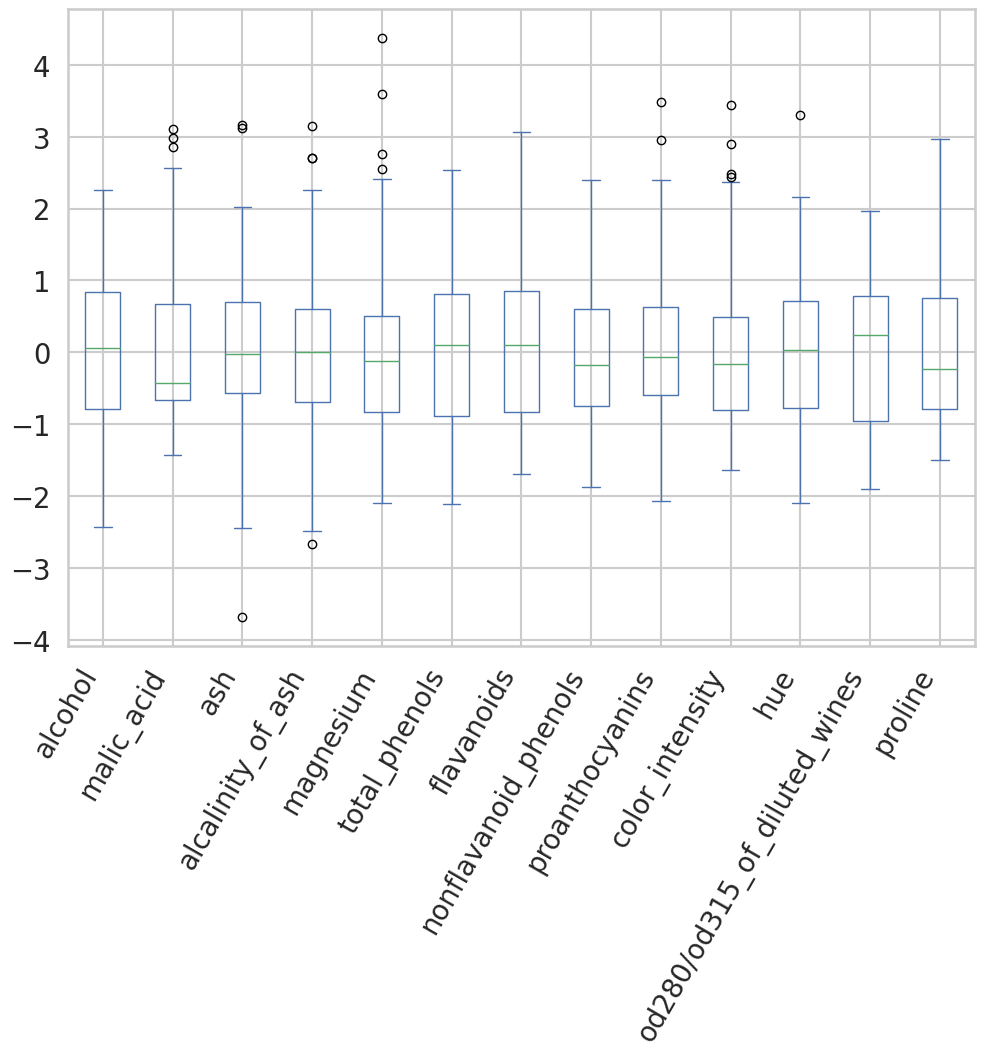

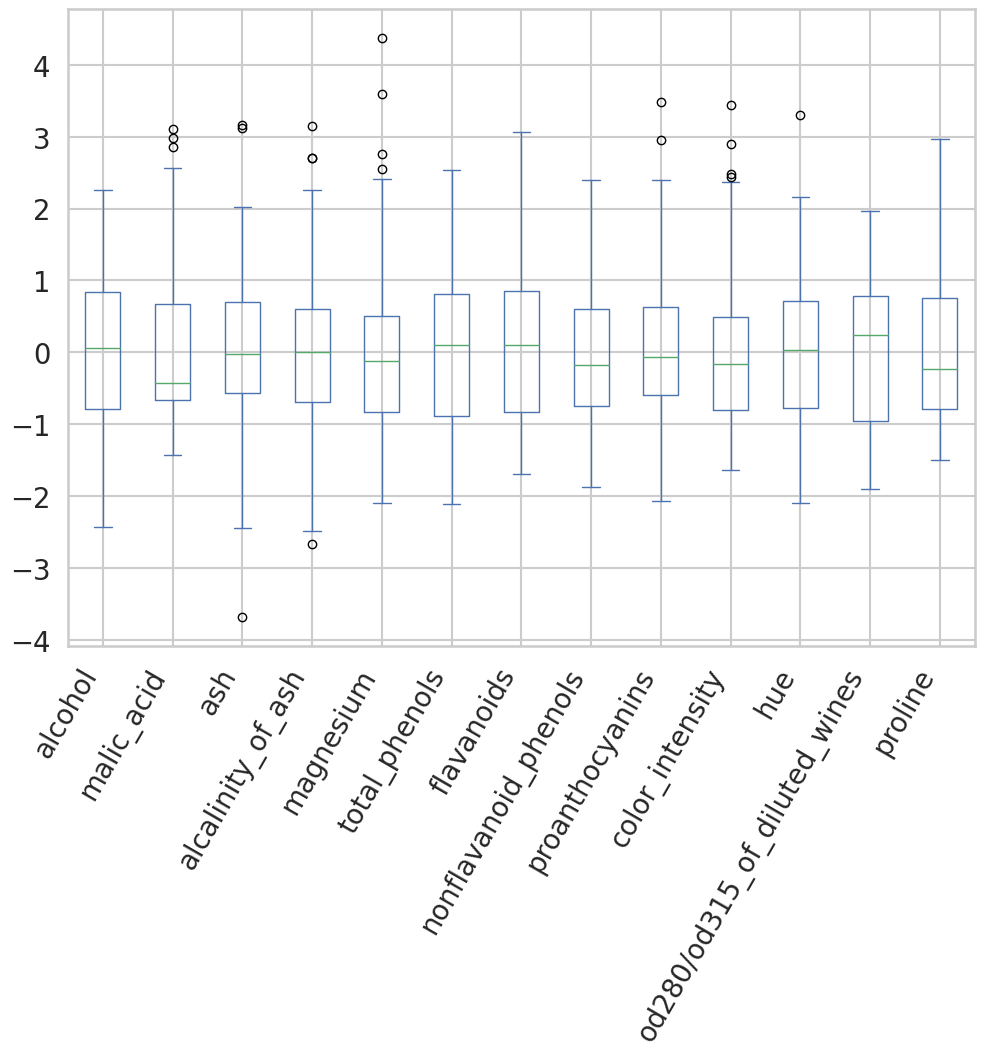

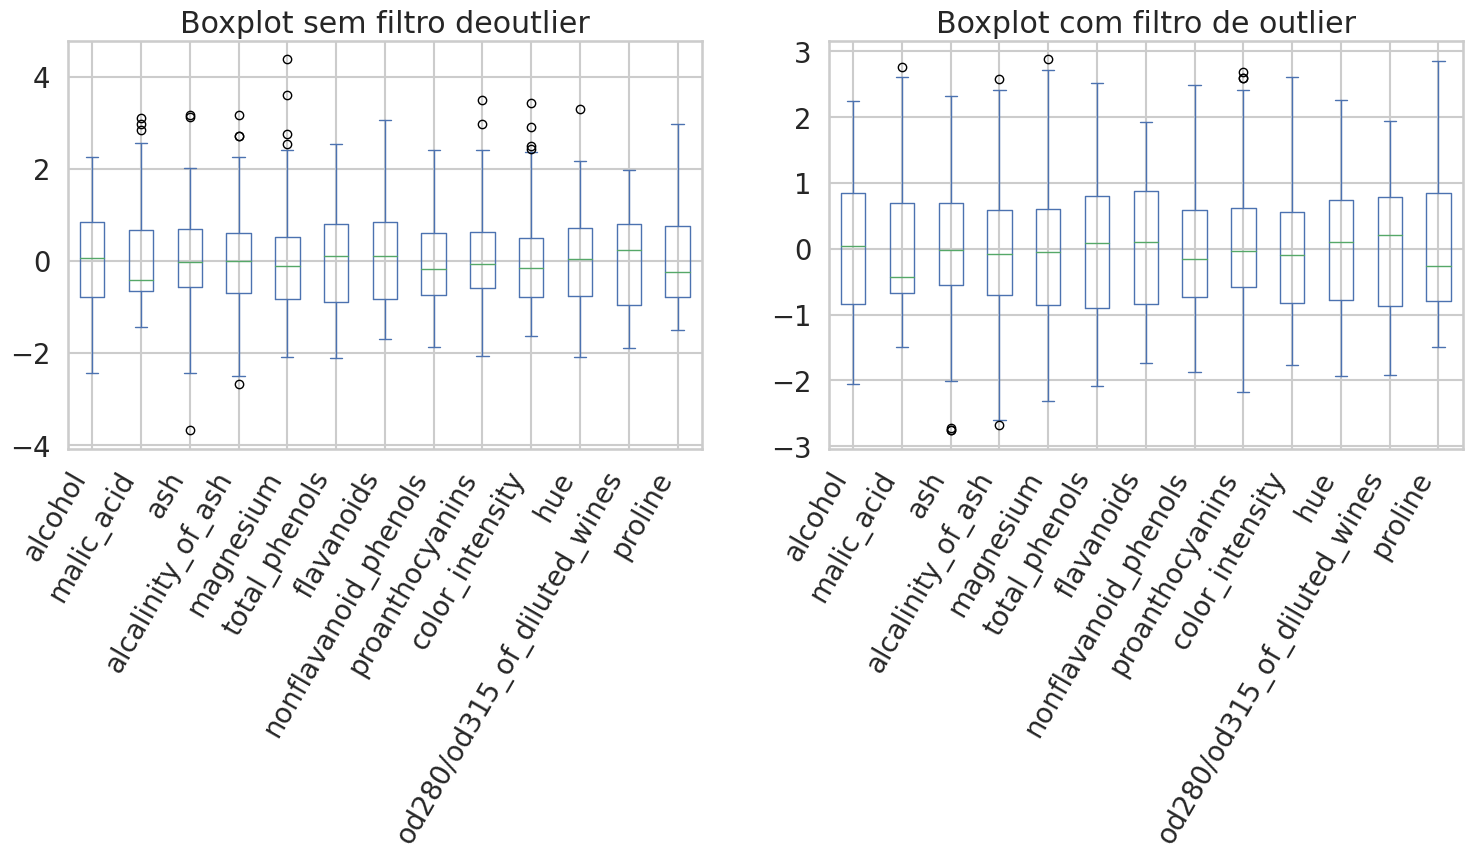

In [31]:
# Figura lado a lado dos dados originais e padronizados
df_sem_outliers = df[~df.apply(is_outlier).any(axis=1)]
fig,axes = plt.subplots(ncols=2, figsize=(18,6))
df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro deoutlier')
df_sem_outliers.apply(scale).plot.box(ax=axes[1],
title='Boxplot com filtro de outlier')
fig.autofmt_xdate(rotation=60, ha='right') 
plt.show()


In [32]:
df_sem_outliers.apply(is_outlier).sum()

alcohol                         0
malic_acid                      1
ash                             3
alcalinity_of_ash               2
magnesium                       1
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 3
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [33]:
def zscore_outlier(array, threshold=3):
    """
    Identifica outliers em um array usando o escore Z.
    
    Parâmetros:
    -----------
    array: numpy.ndarray
        Array unidimensional de valores numéricos.
    
    threshold: float
        Limite para identificação de outliers baseado no escore Z.
        O valor padrão é 3.
        
    Retorna:
    --------
    numpy.ndarray
        Um array booleano com o mesmo comprimento de `array`, onde o valor True indica que o elemento correspondente é um outlier.
    """
    mean = np.mean(array)
    std = np.std(array)
    zscores = np.abs((array - mean) / std)
    return zscores > threshold

"""A função zscore_outlier recebe um array unidimensional de valores numéricos e um parâmetro opcional threshold, 
que é o limite para identificação de outliers baseado no escore Z. O valor padrão de threshold é 3.
A função calcula o escore Z para cada elemento do array usando a fórmula: (valor - média) / desvio padrão. 
Em seguida, ela retorna  um array booleano com o mesmo comprimento de array, onde o valor True indica que o 
elemento correspondente é um outlier com base no limite definido pelo escore Z. Observe que essa é apenas 
uma implementação possível e outras abordagens podem ser usadas para identificar outliers em dados."""

zscore_outlier(df.alcalinity_of_ash)

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: alcalinity_of_ash, Length: 178, dtype: bool

In [34]:
teste = df[~df.apply(zscore_outlier).any(axis=1)]

In [37]:
teste.plot.box()

<AxesSubplot:>

In [36]:
df.apply(zscore_outlier).sum()

alcohol                         0
malic_acid                      1
ash                             3
alcalinity_of_ash               1
magnesium                       2
total_phenols                   0
flavanoids                      1
nonflavanoid_phenols            0
proanthocyanins                 1
color_intensity                 1
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [39]:
# lower and upper bounds
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
iqr

alcohol                           1.3150
malic_acid                        1.4800
ash                               0.3475
alcalinity_of_ash                 4.3000
magnesium                        19.0000
total_phenols                     1.0575
flavanoids                        1.6700
nonflavanoid_phenols              0.1675
proanthocyanins                   0.7000
color_intensity                   2.9800
hue                               0.3375
od280/od315_of_diluted_wines      1.2325
proline                         484.5000
dtype: float64

In [40]:
# lower and upper bounds para identificar outliers, o que está acima ou abaixo do limite inferior ou superior é considerado outlier
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)
print(lower_bound)
print(upper_bound)

alcohol                          10.39000
malic_acid                       -0.61750
ash                               1.68875
alcalinity_of_ash                10.75000
magnesium                        59.50000
total_phenols                     0.15625
flavanoids                       -1.30000
nonflavanoid_phenols              0.01875
proanthocyanins                   0.20000
color_intensity                  -1.25000
hue                               0.27625
od280/od315_of_diluted_wines      0.08875
proline                        -226.25000
dtype: float64
alcohol                           15.65000
malic_acid                         5.30250
ash                                3.07875
alcalinity_of_ash                 27.95000
magnesium                        135.50000
total_phenols                      4.38625
flavanoids                         5.38000
nonflavanoid_phenols               0.68875
proanthocyanins                    3.00000
color_intensity                   10.67000
hue      

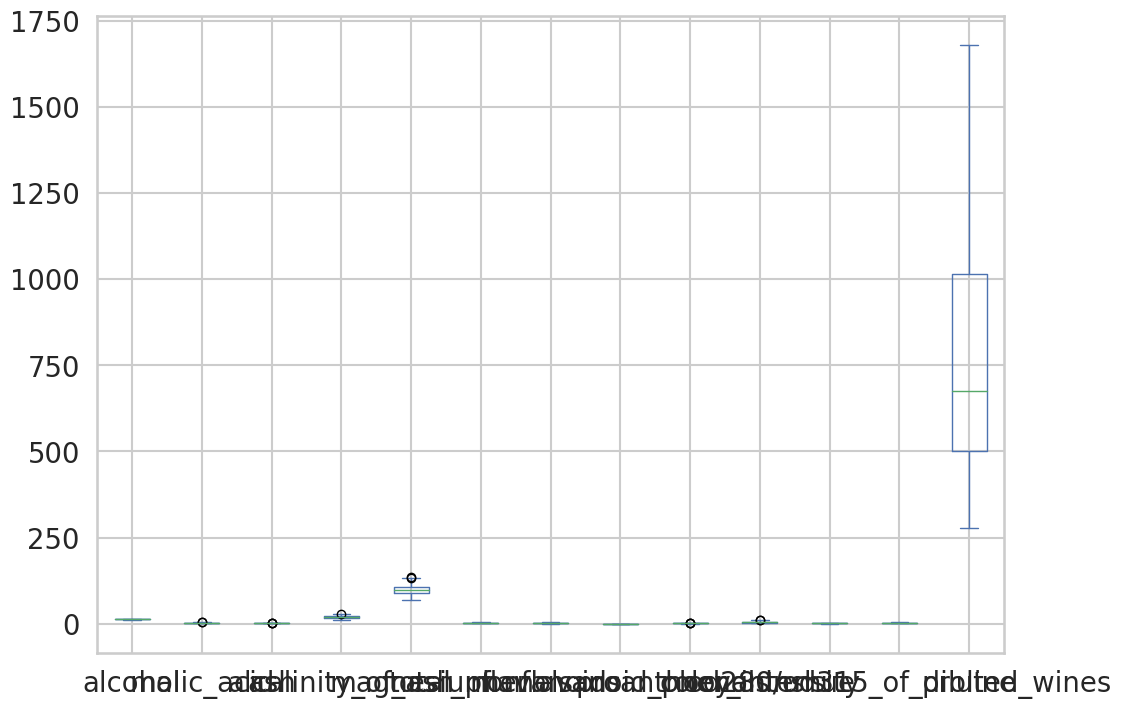

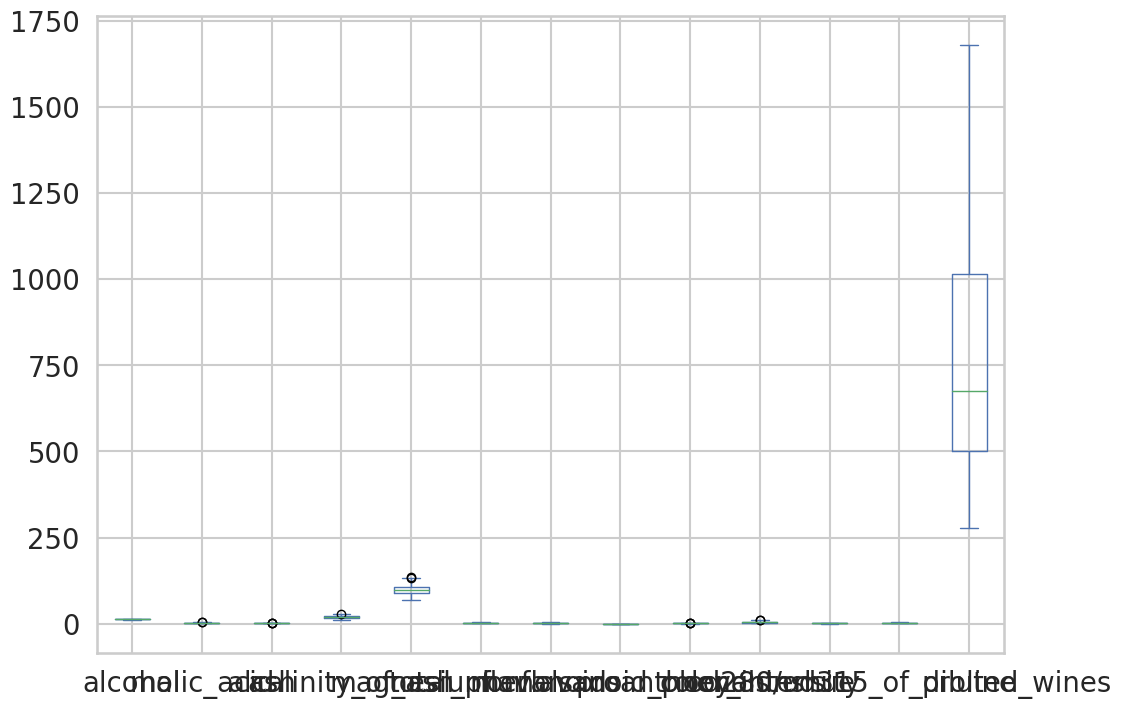

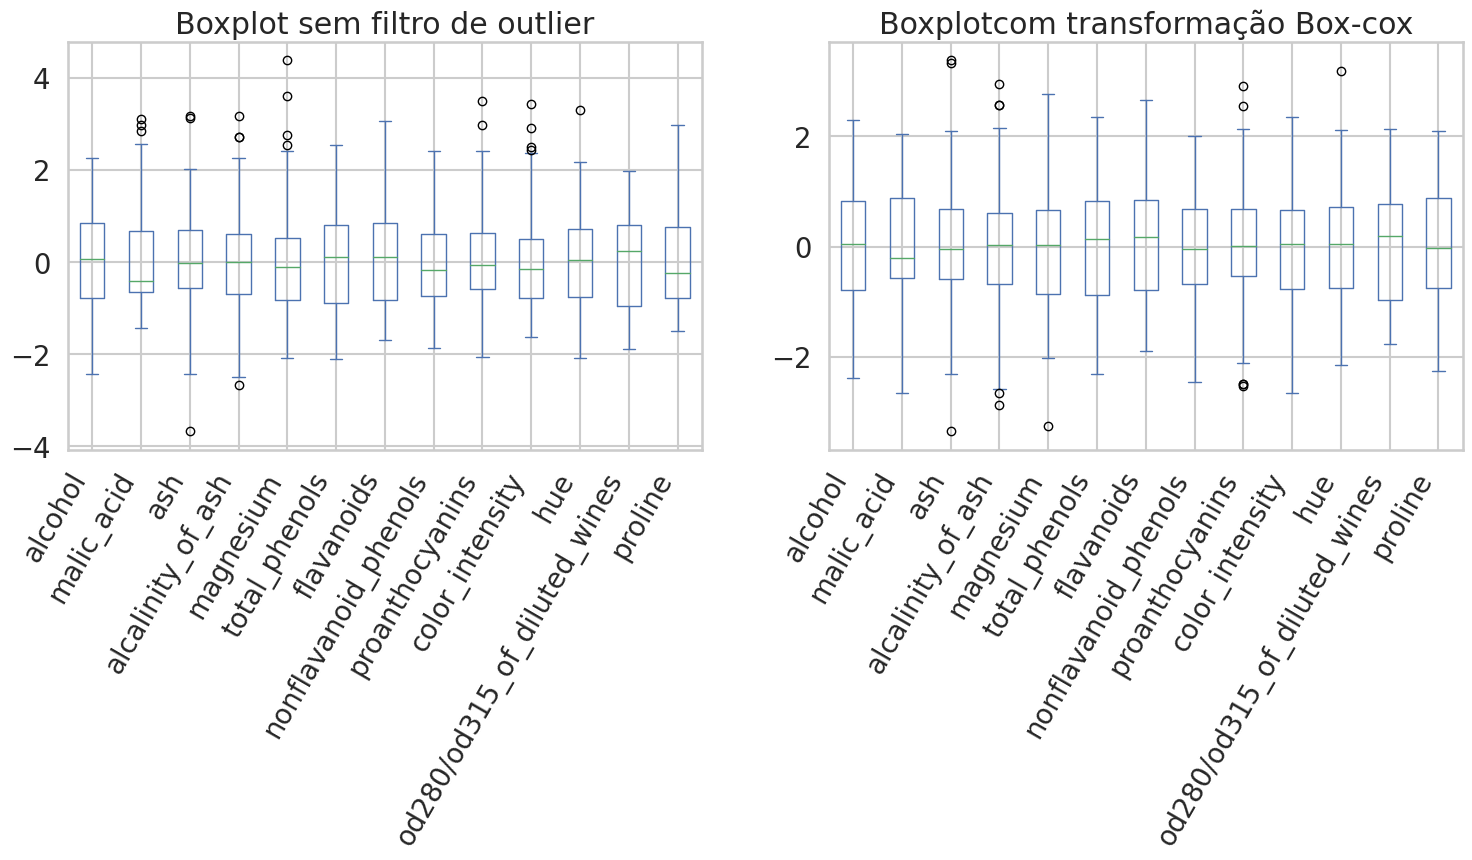

In [41]:
df_boxbox = pd.DataFrame(power_transform(df, method='box-cox'),columns=df.columns) 
fig,axes = plt.subplots(ncols=2, figsize=(18,6))
df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier') 
df_boxbox.plot.box(ax=axes[1], title='Boxplotcom transformação Box-cox') 
fig.autofmt_xdate(rotation=60,ha='right') 
plt.show()